<a href="https://colab.research.google.com/github/varunveda/Shipment_insights/blob/main/Ship_insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unsupervised Learning: Clustering using K Means

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
 # Loading the dataset
data = pd.read_csv('/content/Train.csv')

In [ ]:
# Handle categorical data
label_encoders = {}
categorical_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
# Select relevant features
features = data.drop(columns=['ID', 'Reached.on.Time_Y.N'])

In [ ]:
# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing K Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

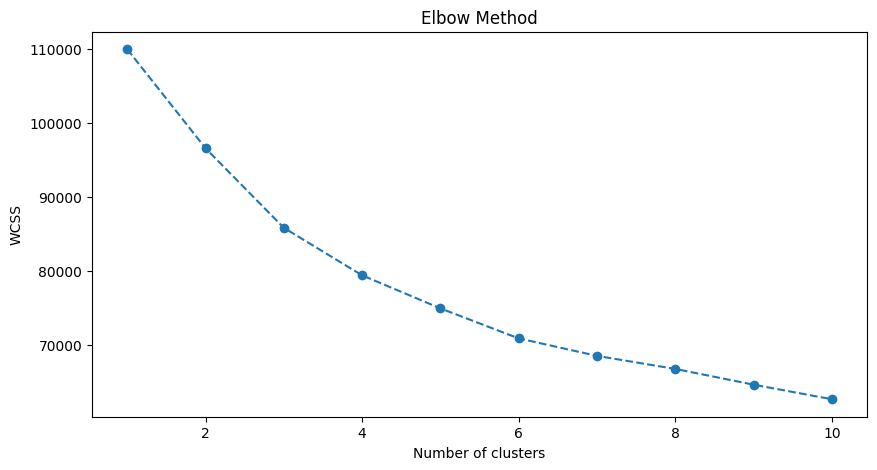

In [ ]:
# Using the elbow method to find the optimal number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the results on a graph
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Choosing the number of clusters to be 3
n = 3  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)


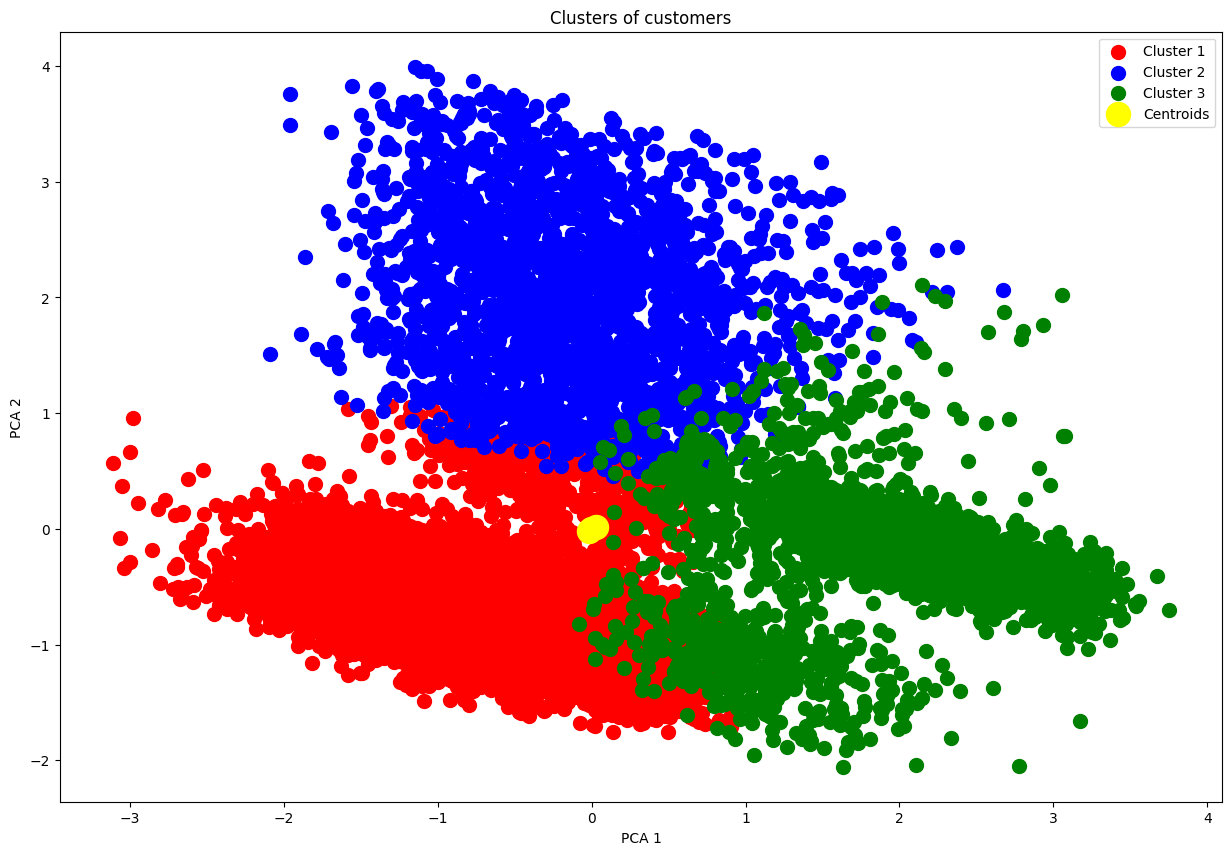

In [ ]:
# Using Principal Component Analysis to visualize the data

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(15,10))
plt.scatter(principal_components[clusters == 0, 0], principal_components[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(principal_components[clusters == 1, 0], principal_components[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(principal_components[clusters == 2, 0], principal_components[clusters == 2, 1], s=100, c='green', label='Cluster 3')

# add more if you have more clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


In [ ]:
# Add the cluster assignments back to the original scaled data
data['Cluster'] = clusters

# Compute the mean values of each cluster
cluster_summary = data.groupby('Cluster').mean()

print(cluster_summary)


                  ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
Cluster                                                                        
0        6297.141221         2.328261          1.517428             3.722140   
1        1608.020426         2.373446          1.531083             3.656306   
2        6977.013657         2.311077          1.503414             5.165023   

         Customer_rating  Cost_of_the_Product  Prior_purchases  \
Cluster                                                          
0               2.984291           201.213549         3.066274   
1               2.953819           188.743339         3.081705   
2               3.036419           249.350910         5.144917   

         Product_importance    Gender  Discount_offered  Weight_in_gms  \
Cluster                                                                  
0                  1.350188  0.501064          5.906235    4775.878580   
1                  1.321936  0.488455         

Predictive Analytics: Exploratory Data Analysis

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Loading the dataset
data = pd.read_csv('/content/Train.csv')

# Handle categorical data using Label Encoding
label_encoders = {}
categorical_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Splitting the data into train and test sets (80% train, 20% test)
X = data.drop(columns=['ID', 'Reached.on.Time_Y.N'])
y = data['Reached.on.Time_Y.N']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

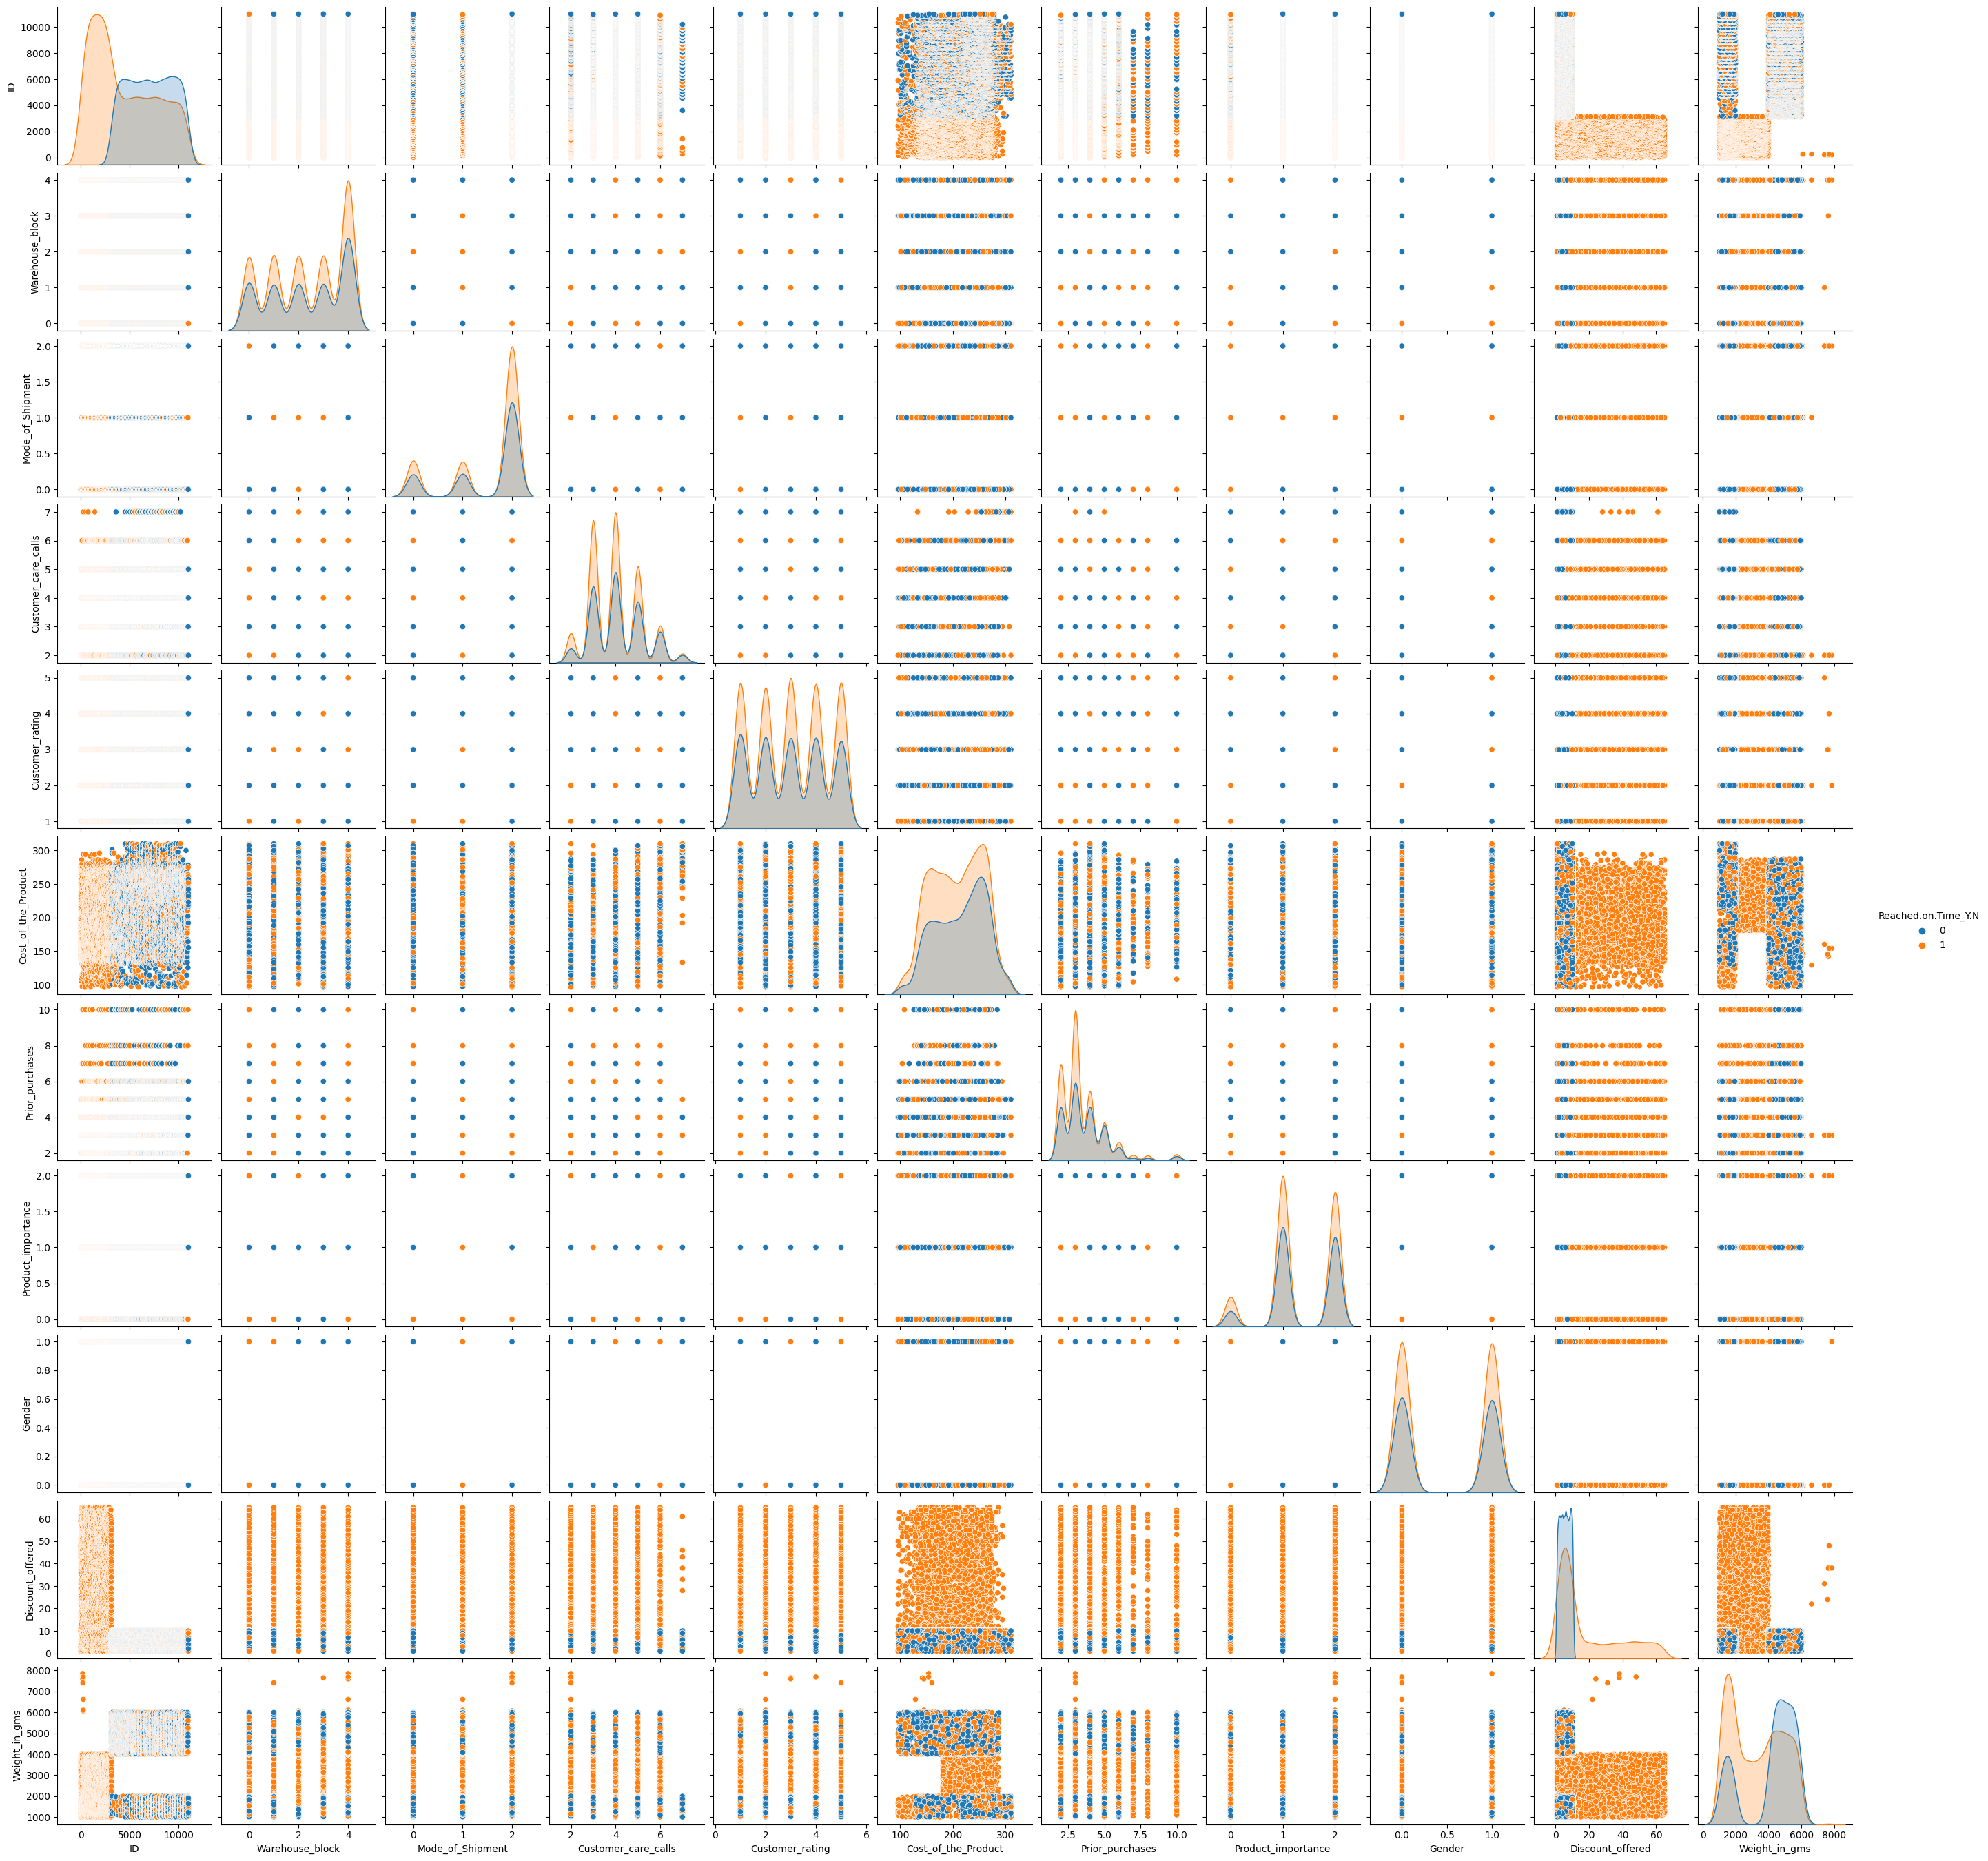

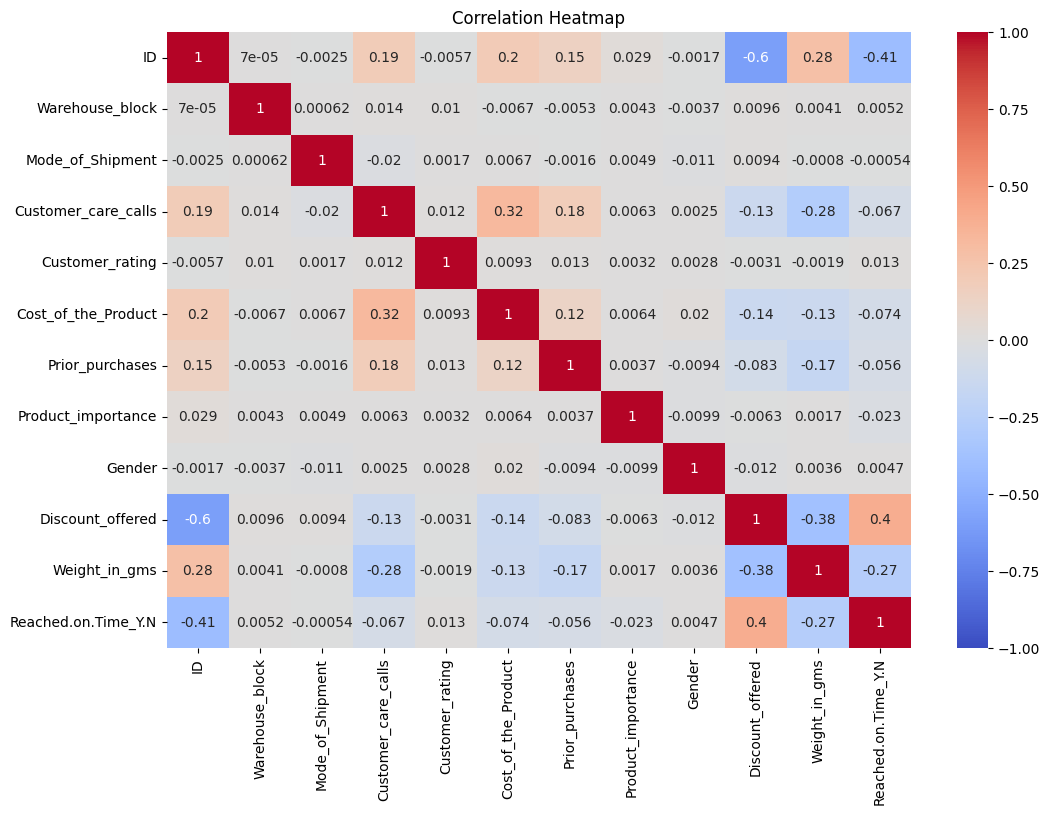

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for a general overview of data distribution and relationships
sns.pairplot(data, hue='Reached.on.Time_Y.N')
plt.show()

# Correlation heatmap to see the relationship between variables
correlation = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


Accuracy: 0.6354545454545455

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.55      0.55       895
           1       0.69      0.69      0.69      1305

    accuracy                           0.64      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.64      0.64      2200



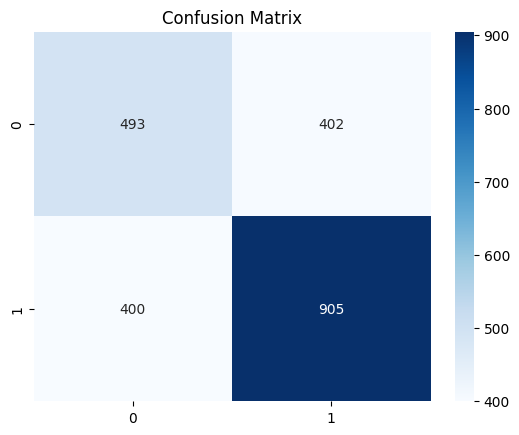

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression model
lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.feature_selection import RFECV

selector = RFECV(estimator=LogisticRegression(), step=1, cv=5)
selector = selector.fit(X_train, y_train)

# Most important features
important_features = list(X.columns[selector.support_])
print("Important Features:", important_features)


Important Features: ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']


In [ ]:
import statsmodels.api as sm

X_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_const)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Reached.on.Time_Y.N   R-squared:                       0.182
Model:                             OLS   Adj. R-squared:                  0.181
Method:                  Least Squares   F-statistic:                     195.0
Date:                 Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                         06:32:39   Log-Likelihood:                -5333.8
No. Observations:                 8799   AIC:                         1.069e+04
Df Residuals:                     8788   BIC:                         1.077e+04
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5976      0.005    126.27

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())


Cross-Validation Scores: [0.63011364 0.65625    0.62897727 0.625      0.65776009]
Average Score: 0.6396202000103365


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Model Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.665


In [ ]:
import xgboost as xgb

# Set up the data in XGBoost's DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters
param = {
    'max_depth': 5,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train XGBoost
num_round = 100
bst = xgb.train(param, dtrain, num_round)

# Predictions
y_pred_xgb = bst.predict(dtest)
y_pred_xgb = [1 if p >= 0.5 else 0 for p in y_pred_xgb]

# Model Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Accuracy: 0.6786363636363636


In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Build a simple neural network model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predictions
y_pred_nn = model.predict(X_test)
y_pred_nn = [1 if p >= 0.5 else 0 for p in y_pred_nn]

# Model Evaluation
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))


Epoch 1/50
275/275 [==============================] - 3s 5ms/step - loss: 0.5599 - accuracy: 0.6381 - val_loss: 0.5272 - val_accuracy: 0.6691
Epoch 2/50
275/275 [==============================] - 2s 6ms/step - loss: 0.5293 - accuracy: 0.6603 - val_loss: 0.5229 - val_accuracy: 0.6623
Epoch 3/50
275/275 [==============================] - 1s 3ms/step - loss: 0.5245 - accuracy: 0.6645 - val_loss: 0.5222 - val_accuracy: 0.6682
Epoch 4/50
275/275 [==============================] - 1s 4ms/step - loss: 0.5206 - accuracy: 0.6684 - val_loss: 0.5205 - val_accuracy: 0.6691
Epoch 5/50
275/275 [==============================] - 1s 3ms/step - loss: 0.5197 - accuracy: 0.6697 - val_loss: 0.5204 - val_accuracy: 0.6641
Epoch 6/50
275/275 [==============================] - 1s 3ms/step - loss: 0.5169 - accuracy: 0.6712 - val_loss: 0.5179 - val_accuracy: 0.6655
Epoch 7/50
275/275 [==============================] - 1s 3ms/step - loss: 0.5157 - accuracy: 0.6723 - val_loss: 0.5175 - val_accuracy: 0.6695
Epoch 

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Initialize the XGBoost classifier
clf = xgb.XGBClassifier()

# Define the parameter grid
param_dist = {
    'learning_rate': np.linspace(0.01, 1, 10),
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 2, 3, 4],
    'n_estimators': [50, 100, 150, 200, 250],
    'subsample': np.linspace(0.5, 1, 6),
    'colsample_bytree': np.linspace(0.5, 1, 6),
    'gamma': np.linspace(0, 0.5, 11)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    clf,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter combinations to sample. Adjust based on your time/computational power
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=1,  # Display messages while training
    random_state=42  # For reproducibility
)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model on the test set
best_clf = random_search.best_estimator_
y_pred_best = best_clf.predict(X_test)

# Model Evaluation
print("Accuracy with Best Model:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report with Best Model:\n", classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.9, 'n_estimators': 250, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0.0, 'colsample_bytree': 1.0}
Accuracy with Best Model: 0.6895454545454546

Classification Report with Best Model:
               precision    recall  f1-score   support

           0       0.57      0.94      0.71       895
           1       0.92      0.52      0.67      1305

    accuracy                           0.69      2200
   macro avg       0.75      0.73      0.69      2200
weighted avg       0.78      0.69      0.68      2200



In [ ]:
data['interaction_term1'] = data['Cost_of_the_Product'] * data['Prior_purchases']


In [ ]:
data['Cost_squared'] = data['Cost_of_the_Product']**2


In [ ]:
data['Cost_category'] = pd.cut(data['Cost_of_the_Product'], bins=[0, 50, 150, 500], labels=['Low', 'Medium', 'High'])


In [ ]:
data['log_Cost'] = np.log1p(data['Cost_of_the_Product'])


In [ ]:
from sklearn.decomposition import PCA

# Standardizing the data is crucial before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['ID', 'Reached.on.Time_Y.N']))

pca = PCA(n_components=5)  # Adjust n_components based on the desired number or explained variance
principalComponents = pca.fit_transform(scaled_data)


In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
importance = model.feature_importances_


In [ ]:
print("Accuracy with Best Model:", accuracy_score(y_test, y_pred))

Accuracy with Best Model: 0.6354545454545455


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Cost_category'] = le.fit_transform(data['Cost_category'])

KeyError: ignored

In [ ]:
print(data.dtypes)


ID                       int64
Warehouse_block          int64
Mode_of_Shipment         int64
Customer_care_calls      int64
Customer_rating          int64
Cost_of_the_Product      int64
Prior_purchases          int64
Product_importance       int64
Gender                   int64
Discount_offered         int64
Weight_in_gms            int64
Reached.on.Time_Y.N      int64
interaction_term1        int64
Cost_squared             int64
log_Cost               float64
Cost_category_1          uint8
dtype: object
